In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("./global_income_inequality.csv")
data

,Country,Year,Population,Gini Index,Average Income (USD),Top 10% Income Share (%),Bottom 10% Income Share (%),Income Group
0,United States,2000,30072337,0.333105,37106.735536,30.780946,1.096329,High Income
1,United States,2001,15189465,0.508761,16250.105075,54.563475,1.441728,Low Income
2,United States,2002,89001835,0.229093,40069.586399,37.200666,1.374502,High Income
3,United States,2003,297595139,0.230673,1233.469995,40.453246,4.493424,Lower Middle Income
4,United States,2004,23680558,0.544657,22950.248061,45.343660,3.250805,High Income
...,...,...,...,...,...,...,...,...
355,Saudi Arabia,2019,76352940,0.298362,22142.286345,27.316935,4.168030,High Income
356,Saudi Arabia,2020,59947230,0.300902,23503.216793,51.791266,1.842205,Low Income
357,Saudi Arabia,2021,8614363,0.470990,44303.921142,24.308291,1.967456,Low Income
358,Saudi Arabia,2022,210722601,0.210066,56770.870968,42.414258,2.048774,Low Income


In [3]:
data.columns

Index(['Country', 'Year', 'Population', 'Gini Index', 'Average Income (USD)',
       'Top 10% Income Share (%)', 'Bottom 10% Income Share (%)',
       'Income Group'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      360 non-null    object 
 1   Year                         360 non-null    int64  
 2   Population                   360 non-null    int64  
 3   Gini Index                   360 non-null    float64
 4   Average Income (USD)         360 non-null    float64
 5   Top 10% Income Share (%)     360 non-null    float64
 6   Bottom 10% Income Share (%)  360 non-null    float64
 7   Income Group                 360 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 22.6+ KB


In [5]:
data.isnull().sum()

Country                        0
Year                           0
Population                     0
Gini Index                     0
Average Income (USD)           0
Top 10% Income Share (%)       0
Bottom 10% Income Share (%)    0
Income Group                   0
dtype: int64

In [6]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,360.0,2.011500e+03,6.931821e+00,2.000000e+03,2.005750e+03,2.011500e+03,2.017250e+03,2.023000e+03
Population,360.0,1.722251e+08,1.016954e+08,5.493471e+06,7.873280e+07,1.754913e+08,2.541225e+08,3.491768e+08
Gini Index,360.0,4.257574e-01,1.280952e-01,2.002849e-01,3.179494e-01,4.296147e-01,5.388502e-01,6.452613e-01
Average Income (USD),360.0,3.543384e+04,2.042534e+04,1.031459e+03,1.865590e+04,3.447082e+04,5.425999e+04,6.973271e+04
Top 10% Income Share (%),360.0,4.020068e+01,1.149531e+01,2.005323e+01,3.048592e+01,4.039137e+01,4.992010e+01,5.993917e+01
Bottom 10% Income Share (%),360.0,2.992700e+00,1.147626e+00,1.022658e+00,1.994917e+00,2.975537e+00,4.025345e+00,4.986443e+00


In [7]:
sns.set(style="whitegrid", palette="muted")


In [8]:
top_5_gini = data.nlargest(5, 'Gini Index')[['Country', 'Year', 'Gini Index']]
bottom_5_gini = data.nsmallest(5, 'Gini Index')[['Country', 'Year', 'Gini Index']]
# 2. Trend of Average Income Over Time (for top 3 countries by population)
top_3_pop_countries = data.groupby('Country')['Population'].max().nlargest(3).index
avg_income_trend = data[data['Country'].isin(top_3_pop_countries)]

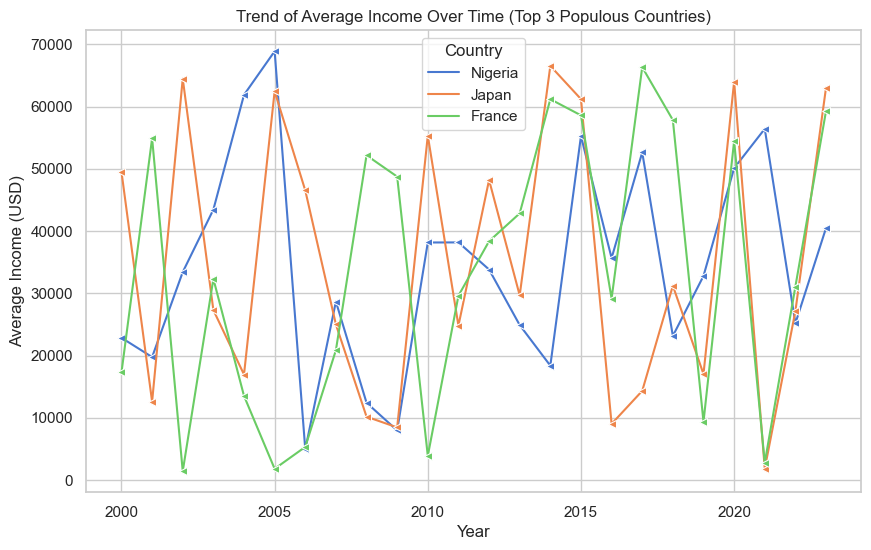

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_income_trend, x='Year', y='Average Income (USD)', hue='Country', marker='<')
plt.title("Trend of Average Income Over Time (Top 3 Populous Countries)")
plt.show()

In [11]:
income_share_evolution = data.groupby('Year')[
    ['Top 10% Income Share (%)', 'Bottom 10% Income Share (%)']
].mean().reset_index()


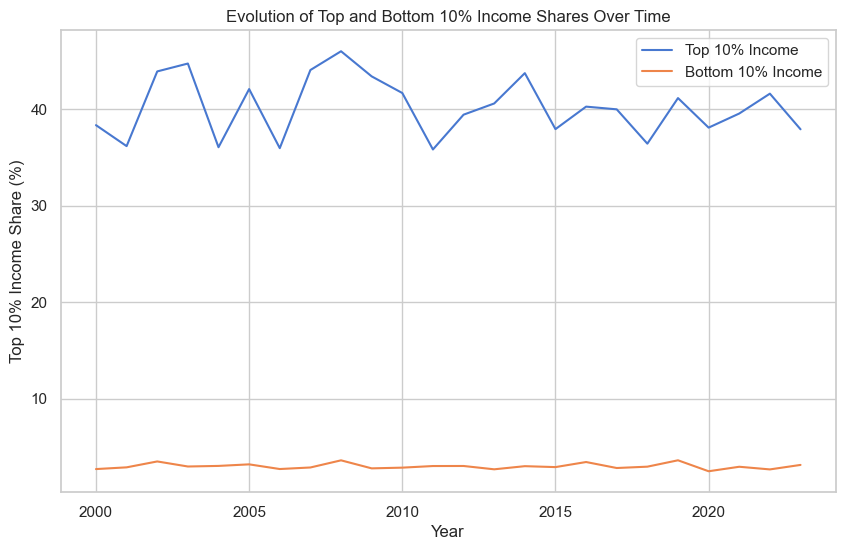

In [33]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=income_share_evolution, x='Year', y='Top 10% Income Share (%)', label='Top 10% Income')
sns.lineplot(data=income_share_evolution, x='Year', y='Bottom 10% Income Share (%)', label='Bottom 10% Income')
plt.title("Evolution of Top and Bottom 10% Income Shares Over Time")
plt.legend()
plt.show()

In [13]:
most_populated = data.nlargest(5, 'Population')[['Country', 'Year', 'Population']]
least_populated = data.nsmallest(5, 'Population')[['Country', 'Year', 'Population']]

print("\nMost Populated Countries:")
print(most_populated)
print("\nLeast Populated Countries:")
print(least_populated)


Most Populated Countries:
     Country  Year  Population
198    Japan  2006   349176812
102  Nigeria  2006   348813486
293   France  2005   348053957
177   Russia  2009   347898848
190   Russia  2022   346630522

Least Populated Countries:
    Country  Year  Population
59   Brazil  2011     5493471
243  Canada  2003     5843971
39    India  2015     5938668
69   Brazil  2021     6604029
303  France  2015     7280546


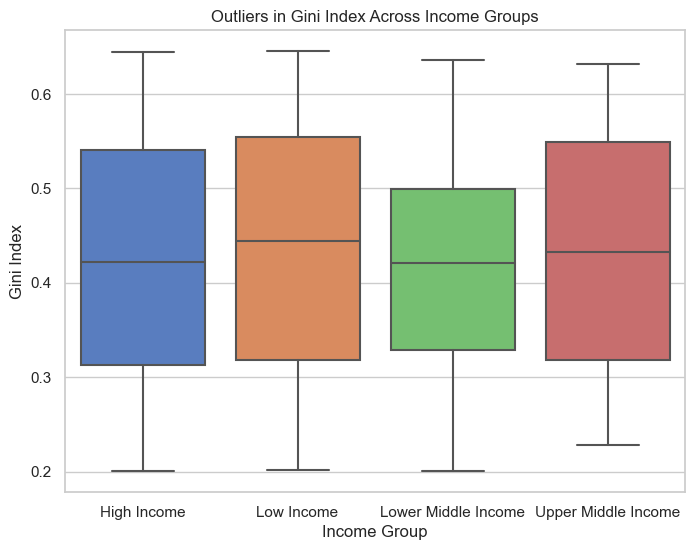

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Income Group', y='Gini Index')
plt.title("Outliers in Gini Index Across Income Groups")
plt.show()

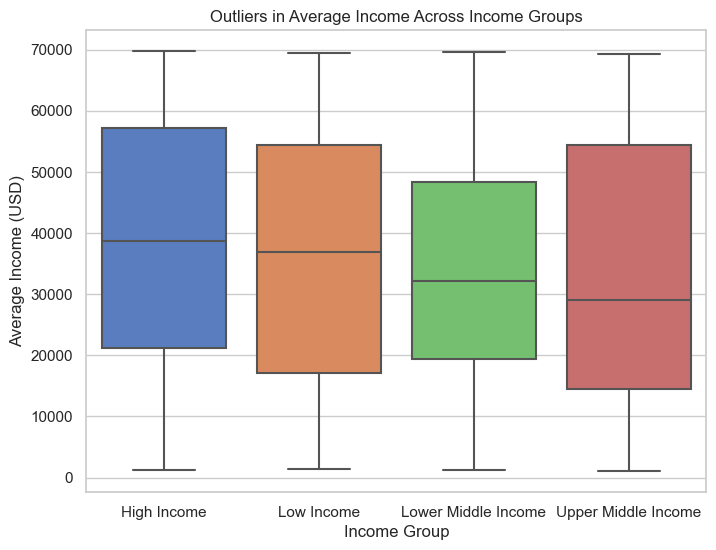

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Income Group', y='Average Income (USD)')
plt.title("Outliers in Average Income Across Income Groups")
plt.show()

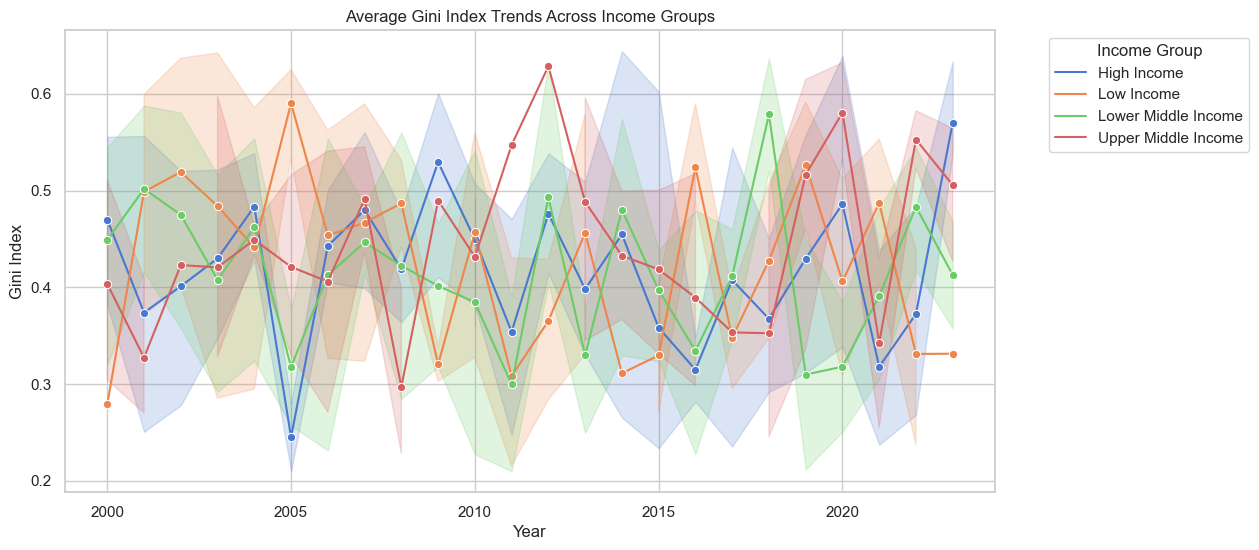

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Gini Index', hue='Income Group', marker='o')
plt.title("Average Gini Index Trends Across Income Groups")
plt.xlabel("Year")
plt.ylabel("Gini Index")
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [17]:
gini_diff = data.groupby('Country')['Gini Index'].agg(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
top_increase = gini_diff.nlargest(5, 'Gini Index')

print("Top 5 Countries with Highest Increase in Gini Index:")
print(top_increase)


Top 5 Countries with Highest Increase in Gini Index:
   Country  Gini Index
6    India    0.327304
7    Japan    0.260418
9  Nigeria    0.176413
3    China    0.171440
4   France    0.159969


Correlation between Gini Index and Average Income: 0.01


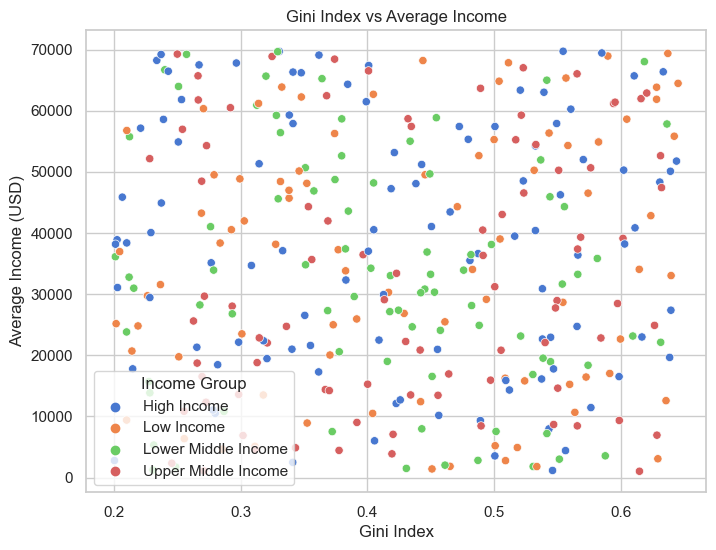

In [18]:
correlation = data['Gini Index'].corr(data['Average Income (USD)'])
print(f"Correlation between Gini Index and Average Income: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Gini Index', y='Average Income (USD)', hue='Income Group')
plt.title("Gini Index vs Average Income")
plt.show()



In [19]:
high_inequality_income = data[(data['Gini Index'] > 0.5) & (data['Average Income (USD)'] > 50000)]
print("\nCountries with High Gini Index and High Average Income:")
print(high_inequality_income[['Country', 'Year', 'Gini Index', 'Average Income (USD)']])



Countries with High Gini Index and High Average Income:
            Country  Year  Gini Index  Average Income (USD)
12    United States  2012    0.554506          69732.712622
21    United States  2021    0.604786          58623.768418
29            India  2005    0.616021          61976.625810
44            India  2020    0.576277          50662.783297
46            India  2022    0.523045          67030.930345
47            India  2023    0.620549          62898.340191
56           Brazil  2008    0.531644          50266.483288
57           Brazil  2009    0.610619          65707.140203
70           Brazil  2022    0.582527          54914.812170
77          Germany  2005    0.637192          69381.272423
83          Germany  2011    0.549423          57912.777309
86          Germany  2014    0.644025          51765.800555
92          Germany  2020    0.543418          56354.729408
95          Germany  2023    0.633544          66369.851117
100         Nigeria  2004    0.628303      

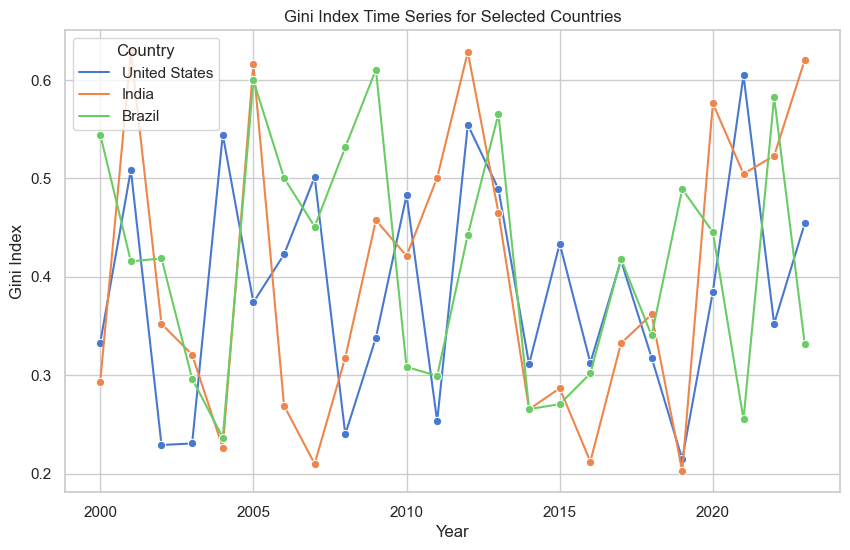

In [20]:
selected_countries = ['United States', 'India', 'Brazil']
subset = data[data['Country'].isin(selected_countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x='Year', y='Gini Index', hue='Country', marker='o')
plt.title("Gini Index Time Series for Selected Countries")
plt.show()


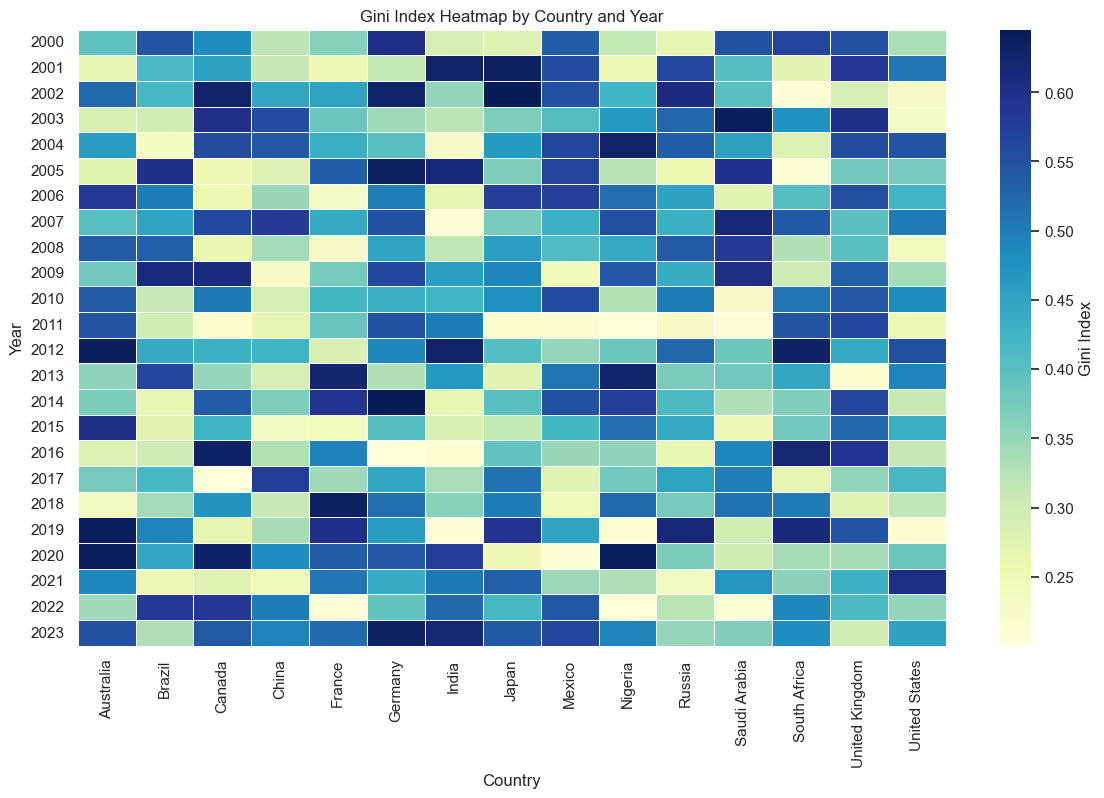

In [21]:
gini_pivot = data.pivot_table(values='Gini Index', index='Year', columns='Country', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(gini_pivot, cmap='YlGnBu', cbar_kws={'label': 'Gini Index'}, linewidths=0.5)
plt.title("Gini Index Heatmap by Country and Year")
plt.show()


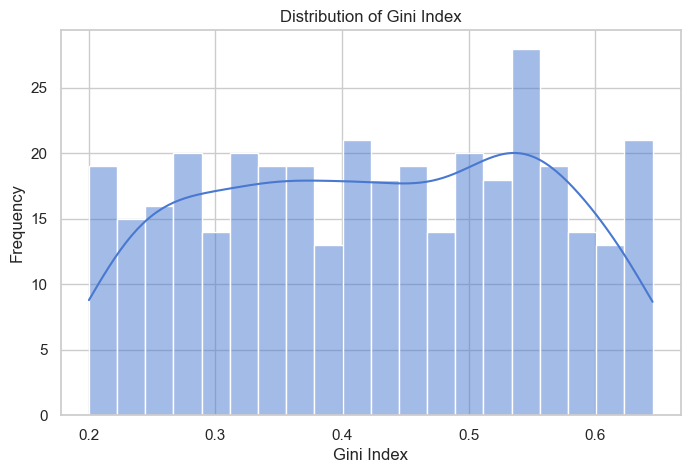

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Gini Index'], bins=20, kde=True)
plt.title("Distribution of Gini Index")
plt.xlabel("Gini Index")
plt.ylabel("Frequency")
plt.show()


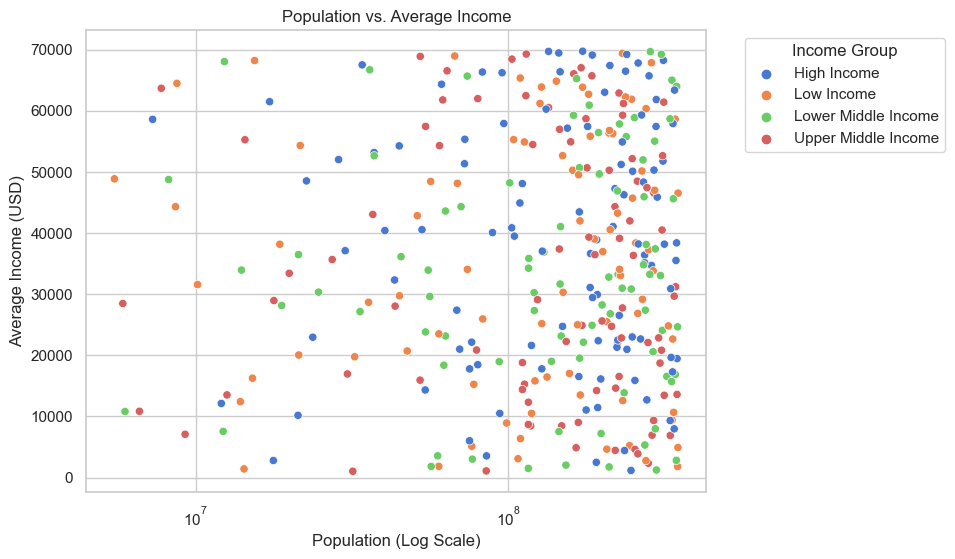

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population', y='Average Income (USD)', hue='Income Group', data=data)
plt.xscale('log')  # Use log scale for better visualization
plt.title("Population vs. Average Income")
plt.xlabel("Population (Log Scale)")
plt.ylabel("Average Income (USD)")
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

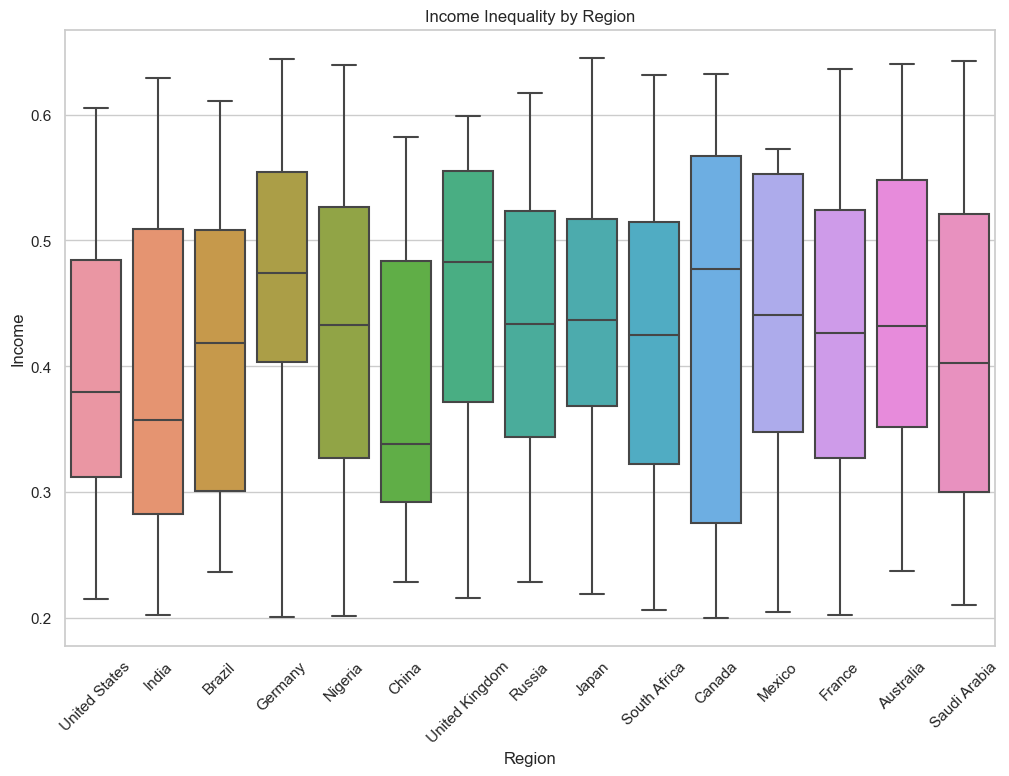

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Country',y='Gini Index', data=data)
plt.title('Income Inequality by Region')
plt.xlabel('Region')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
data.columns

Index(['Country', 'Year', 'Population', 'Gini Index', 'Average Income (USD)',
       'Top 10% Income Share (%)', 'Bottom 10% Income Share (%)',
       'Income Group'],
      dtype='object')

In [27]:
X = data.drop(columns=['Gini Index'])  # Correctly dropping the target variable from features
y = data['Gini Index']

In [28]:
X = pd.get_dummies(X, drop_first=True)

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.22, random_state=48)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.01566455763174163
R-squared: -0.04218921951183208


In [36]:
new_data = pd.DataFrame({
    'Year': [2025],
    'Population': [30000000],  # hypothetical population
    'Average Income (USD)': [800000],  # hypothetical income
    'Top 10% Income Share (%)': [13],  # hypothetical share
    'Bottom 10% Income Share (%)': [7]   # hypothetical share
})

# One-hot encode the new data
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Align the columns of new_data_encoded with the original training data
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

# Scale the new data
new_data_scaled = scaler.transform(new_data_encoded)

# Predict the Gini index for the new data
future_prediction = model.predict(new_data_scaled)
print(f'Predicted Gini Index for 2025: {future_prediction[0]}')

Predicted Gini Index for 2025: 0.728715859013817
